# 1. Import + Settings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/cybersecurity_attacks.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      20000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         19933 non-null  object

# 2. The dataset

In [4]:
print("Shape :", df.shape)
print("Sample :")
df.sample(1)

Shape : (40000, 25)
Sample :


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
14275,2022-02-22 14:51:22,157.95.149.57,189.64.113.40,25762,31200,TCP,1409,Data,FTP,Placeat impedit voluptates illum eligendi quidem a. Hic architecto sapiente velit ab ipsam voluptate. Neque doloribus maxime expedita qui sint facilis.,NaN,79.09,Alert Triggered,DDoS,Known Pattern B,Blocked,Medium,Priyansh Ravel,"Mozilla/5.0 (iPod; U; CPU iPhone OS 4_0 like Mac OS X; sk-SK) AppleWebKit/532.19.5 (KHTML, like Gecko) Version/3.0.5 Mobile/8B113 Safari/6532.19.5",Segment A,"Patna, Odisha",NaN,NaN,Alert Data,Server


In [5]:
df["Proxy Information"].sample(5)

4606       196.75.75.92
11275    174.79.209.242
25933               NaN
30009               NaN
22363               NaN
Name: Proxy Information, dtype: object

In [6]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


# 3. Infos, types, missing values and uniques

In [7]:
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
    "Missing (%)": (df.isnull().sum() / len(df) * 100).round(2).values,
    "Dtype": df.dtypes.astype(str).values,
     "Unique Values": df.nunique().values
})

info_df

,Column,Non-Null Count,Null Count,Missing (%),Dtype,Unique Values
0,Timestamp,40000,0,0.00,object,39997
1,Source IP Address,40000,0,0.00,object,40000
2,Destination IP Address,40000,0,0.00,object,40000
3,Source Port,40000,0,0.00,int64,29761
4,Destination Port,40000,0,0.00,int64,29895
5,Protocol,40000,0,0.00,object,3
6,Packet Length,40000,0,0.00,int64,1437
7,Packet Type,40000,0,0.00,object,2
8,Traffic Type,40000,0,0.00,object,3
9,Payload Data,40000,0,0.00,object,40000


In [8]:
(df["Proxy Information"] == df["Destination IP Address"]).value_counts()

False    40000
Name: count, dtype: int64

# 4. Categorical values balance

In [9]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns[1:] #we don't take timestamp

cat_cols = [
    col for col in cat_cols
    if df[col].nunique(dropna=False) <= 20
]

cat_cols = [
    col for col in cat_cols
    if col != "Attack Type"
]

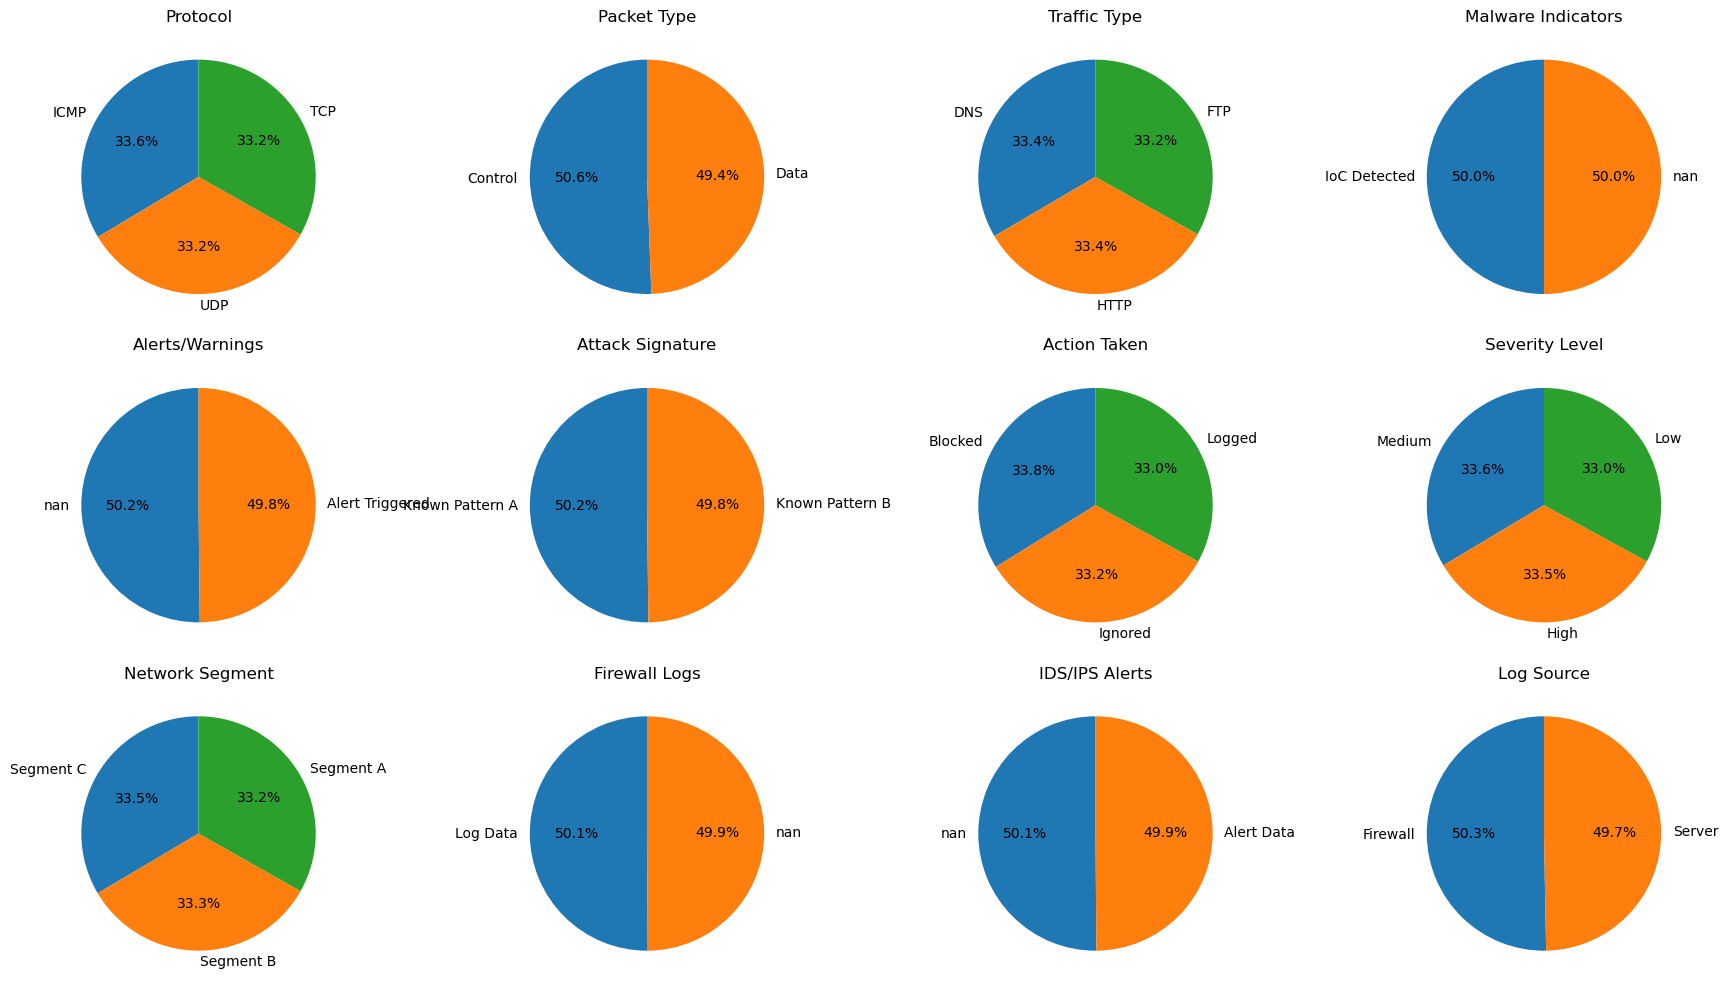

In [24]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts(dropna=False)

    axes[i].pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct="%1.1f%%",
        startangle=90
    )
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


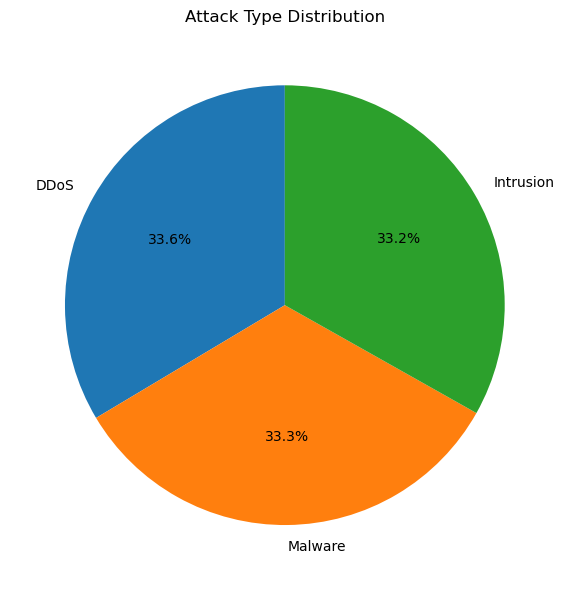

In [11]:
tar_col = df["Attack Type"]

counts = tar_col.value_counts(dropna=False)

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index.astype(str),
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Attack Type Distribution")
plt.tight_layout()
plt.show()

# 5. Numerical values statistics

In [12]:
num_cols = ["Packet Length","Anomaly Scores"]

num_summary = pd.DataFrame({
    "Column": num_cols,
    "Min": df[num_cols].min().values,
    "Max": df[num_cols].max().values,
    "Mean": df[num_cols].mean().values,
})

num_summary

,Column,Min,Max,Mean
0,Packet Length,64.0,1500.0,781.452725
1,Anomaly Scores,0.0,100.0,50.113473


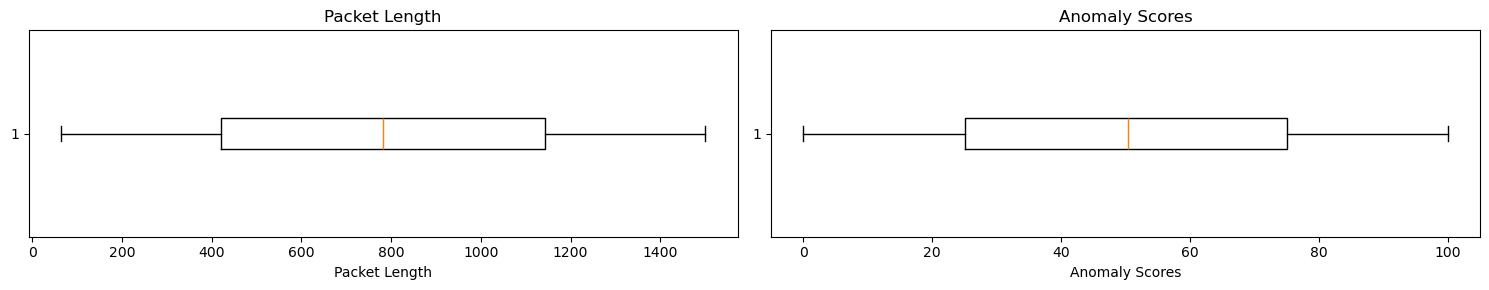

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), vert=False)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 6. Timestamp values check

In [14]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

t_min = df["Timestamp"].min()
t_max = df["Timestamp"].max()
print(f"Time range: {t_min} -> {t_max}")

Time range: 2020-01-01 00:43:27 -> 2023-10-11 19:34:23


<Figure size 1200x600 with 0 Axes>

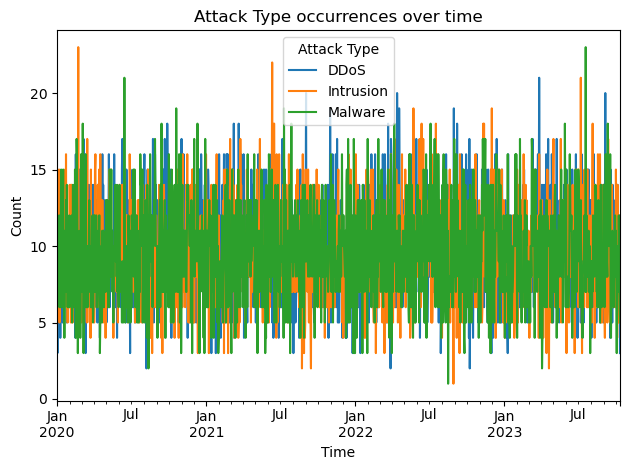

In [15]:
FREQ = "D"

tmp = df.dropna(subset=["Timestamp", "Attack Type"]).copy()
tmp["time_bin"] = tmp["Timestamp"].dt.to_period("D").dt.to_timestamp()

counts = (tmp.groupby(["time_bin", "Attack Type"])
            .size()
            .unstack(fill_value=0)
            .sort_index())

plt.figure(figsize=(12, 6))
counts.plot()
plt.title(f"Attack Type occurrences over time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

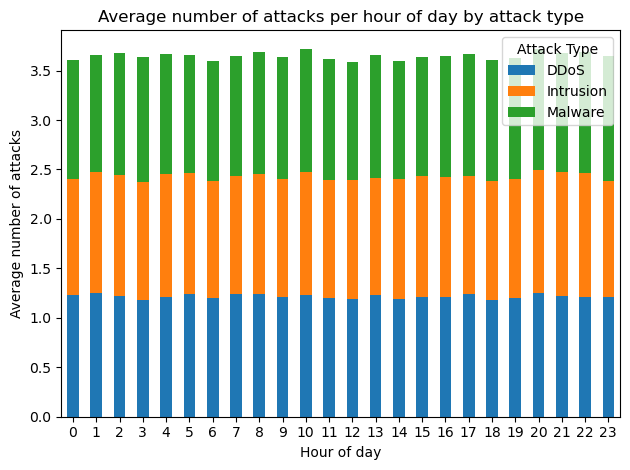

In [16]:
tmp["date"] = tmp["Timestamp"].dt.date
tmp["hour"] = tmp["Timestamp"].dt.hour

counts = (
    tmp.groupby(["date", "hour", "Attack Type"])
       .size()
       .reset_index(name="count")
)

hourly_avg = (
    counts.groupby(["hour", "Attack Type"])["count"]
          .mean()
          .unstack(fill_value=0)
          .sort_index()
)

plt.figure(figsize=(12, 5))
hourly_avg.plot(kind="bar", stacked=True)
plt.title("Average number of attacks per hour of day by attack type")
plt.xlabel("Hour of day")
plt.ylabel("Average number of attacks")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Conclusion and suggestion for data engineering

## Observation :

- The `Payload Data` column seems to be a randomly generated latin text feature, looking like lorem ipsum type of text
- The `Geo-Location Data` column seems to only concern Indian cities and state
- We will see in the main notebook that the `Geo-Location Data` locations and the `Source IP Address` and `Destination IP Address` are not coherent
- On the low cardinality categorical columns, the target is perfectly balanced
- On the numerical columns, the target is also perfectly balanced, without any outliers
- If the goal is to predict the type of attack coming, the post attack columns would not be useful

## Conclusion : 

Our intuition, considering the perfect balance of the target, was that the dataset is completely randomly generated

Considering this, the main goal of this project will be to find an explicit (or implicit) dependance between the features and the target to predict it. 
Assuming the hypothesis that the dataset is completely randomly generated, we will also use the post attack columns since the mindset of the project comes from ***how can we use pre attack inputs to predict the type of the attack ?*** to ***how can we use the inputs to find a logical rule to randomize the attack type as the dataset creator did ?***. This is just a semantic conclusion, the goal will always remain to predict the `Attack Type` from the features we have.


## Suggestion for data engineering :

- Extract a maximum of features from existing columns (timestamp -> hour,day, minutes ... or IP address -> country)
- Replace the NaNs in 1-unique values columns with a lot of missing value (they are hidden boolean columns)
- Drop the lines with a low number of missing values (<1% of the whole dataset)